#Importing the Data

We first make some imports that will be needed for our code

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(42)

We then proceed to label our data and read it into a pandas dataframe

In [3]:
names = ['tao (dimensionless)', 'Uncertainty in tao', 'vmax (S^-1)',
       'Uncertainty in vmax', 'emergent SNeIa flux',
       'Total mass (units=solar mass)', 'Mass of 56Ni (units=solar mass)',
       'Explosion energy (units=1051 ergs)',
       'Initial SNeIa mass distribution flag',
       'Initial 56Ni radial distribution flag']

In [4]:
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/LOX/GSOC_Data_DataCube.txt', names = names, delimiter = ' ')

we take a look at our data and its structure and some information to determine if any preprocessing work will be needed

In [5]:
data.head()

,tao (dimensionless),Uncertainty in tao,vmax (S^-1),Uncertainty in vmax,emergent SNeIa flux,Total mass (units=solar mass),Mass of 56Ni (units=solar mass),Explosion energy (units=1051 ergs),Initial SNeIa mass distribution flag,Initial 56Ni radial distribution flag
0,1.940628,0.179354,0.013531,0.000670,0.000003,0.75,0.15,0.75,hed8,hed8
1,2.071999,0.210287,0.012423,0.000615,0.000003,0.75,0.15,0.75,hed8,mwd
2,2.007982,0.198804,0.012744,0.000685,0.000003,0.75,0.15,0.75,hed8,N100
3,1.661535,0.189436,0.009935,0.000349,0.000003,0.75,0.15,0.75,hed8,w7dt
4,1.907672,0.178607,0.013343,0.000745,0.000003,0.75,0.15,2.00,hed8,hed8


In [6]:
data.describe()

,tao (dimensionless),Uncertainty in tao,vmax (S^-1),Uncertainty in vmax,emergent SNeIa flux,Total mass (units=solar mass),Mass of 56Ni (units=solar mass),Explosion energy (units=1051 ergs)
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,2.576275,0.198927,0.012814,0.000512,0.000007,1.518750,0.393750,1.375000
std,0.391005,0.021055,0.000849,0.000074,0.000004,0.434834,0.230629,0.625611
min,1.661535,0.133992,0.009842,0.000313,0.000003,0.750000,0.150000,0.750000
25%,2.321794,0.183659,0.012372,0.000458,0.000003,1.300000,0.150000,0.750000
50%,2.559251,0.198672,0.012891,0.000501,0.000006,1.600000,0.300000,1.375000
75%,2.812090,0.215768,0.013388,0.000556,0.000011,1.850000,0.600000,2.000000
max,3.621963,0.239162,0.014723,0.000817,0.000015,2.000000,0.750000,2.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tao (dimensionless)                    512 non-null    float64
 1   Uncertainty in tao                     512 non-null    float64
 2   vmax (S^-1)                            512 non-null    float64
 3   Uncertainty in vmax                    512 non-null    float64
 4   emergent SNeIa flux                    512 non-null    float64
 5   Total mass (units=solar mass)          512 non-null    float64
 6   Mass of 56Ni (units=solar mass)        512 non-null    float64
 7   Explosion energy (units=1051 ergs)     512 non-null    float64
 8   Initial SNeIa mass distribution flag   512 non-null    object 
 9   Initial 56Ni radial distribution flag  512 non-null    object 
dtypes: float64(8), object(2)
memory usage: 40.1+ KB


It is clear from the previous cells that there are no missing values and there will be no need for any preprocessing work except maybe scaling the data

#Task 1

since the first task is to see the trends between our observable parameters, we went ahead and put them in a separate dataframe to make our lives easier

In [8]:
obs_params = data[['tao (dimensionless)', 'vmax (S^-1)', 'emergent SNeIa flux',]]
corr = obs_params.corr()

we plot our variables to see if there are any trends and it seems that tao and Φ300 are periodic.

Text(0.5, 1.0, 'emergent SNeIa flux')

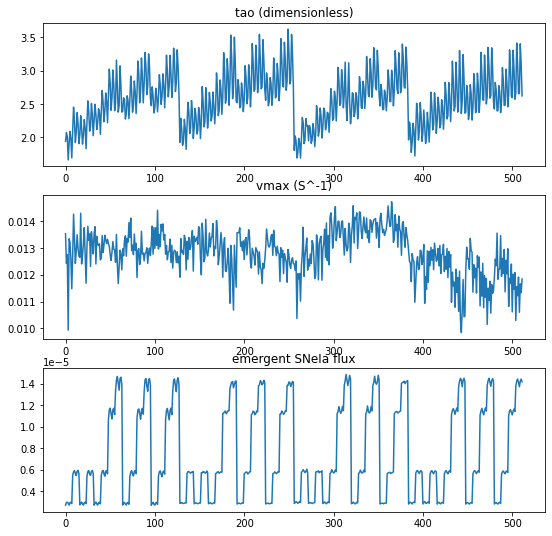

In [9]:
figure, axis = plt.subplots(3, 1, figsize=(9,9))
  
axis[0].plot(obs_params['tao (dimensionless)'])
axis[0].set_title('tao (dimensionless)')
  
axis[1].plot(obs_params['vmax (S^-1)'])
axis[1].set_title('vmax (S^-1)')

axis[2].plot(obs_params['emergent SNeIa flux'])
axis[2].set_title('emergent SNeIa flux')

Now to see the relations between our observable parameters we went ahead and used a correlation matrix, and to further explore those relations we use a pair plot where on the upper half we used a scatter plot and on the lower half a reg plot, and finally a hist plot on the diagonal.

In [10]:
corr.style.background_gradient(cmap='coolwarm')

,tao (dimensionless),vmax (S^-1),emergent SNeIa flux
tao (dimensionless),1.000000,0.139121,0.632440
vmax (S^-1),0.139121,1.000000,-0.256229
emergent SNeIa flux,0.632440,-0.256229,1.000000


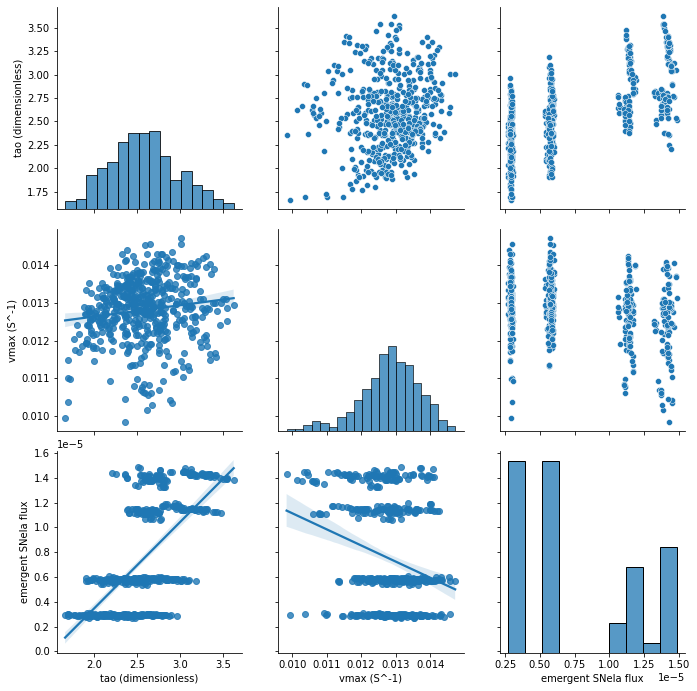

In [11]:
import seaborn as sns

g = sns.PairGrid(obs_params)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)
g.map_upper(sns.scatterplot)

g.fig.set_size_inches(10,10)

from the previous plots, we can see that the strongest correlations are between Φ300 and tao, we can also infer that there are 4 main groups in our data, another thing to note is that tao and vmax are both normally distributed while Φ300 has a wider range

#Task 2

In [12]:
data_tao = data[['tao (dimensionless)', 
            'Total mass (units=solar mass)', 'Mass of 56Ni (units=solar mass)',
            'Explosion energy (units=1051 ergs)',
            'Initial SNeIa mass distribution flag',
            'Initial 56Ni radial distribution flag']]
data_vmax = data[['vmax (S^-1)', 
            'Total mass (units=solar mass)', 'Mass of 56Ni (units=solar mass)',
            'Explosion energy (units=1051 ergs)',
            'Initial SNeIa mass distribution flag',
            'Initial 56Ni radial distribution flag']]
data_phi = data[['emergent SNeIa flux', 
            'Total mass (units=solar mass)', 'Mass of 56Ni (units=solar mass)',
            'Explosion energy (units=1051 ergs)',
            'Initial SNeIa mass distribution flag',
            'Initial 56Ni radial distribution flag']]

In [13]:
import plotly.express as px
fig_tao = px.parallel_coordinates(data_tao, color="tao (dimensionless)",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)

fig_vmax = px.parallel_coordinates(data_vmax, color="vmax (S^-1)",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)

fig_phi = px.parallel_coordinates(data_phi, color="emergent SNeIa flux",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig_tao.show()
fig_vmax.show()
fig_phi.show()

We used a parallel coordinates plot to see the relationships between our observable parameters and our numerical physical parameters.
at the first glance, it is clear that our data needs scaling because tao has a wider range compared to vmax and phi 300, something also to note is that although our parameters are numerical they only seem to take a set amount of values.

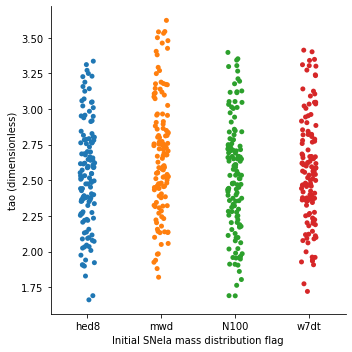

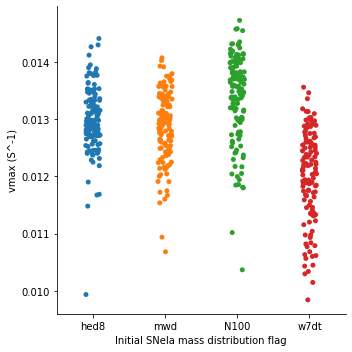

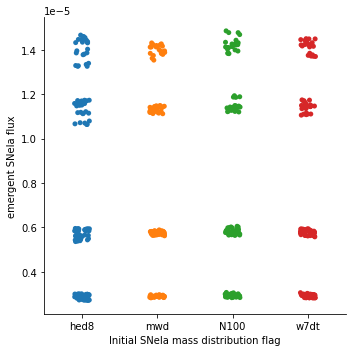

In [14]:
sns.catplot(y="tao (dimensionless)", x="Initial SNeIa mass distribution flag", data=data)
sns.catplot(y="vmax (S^-1)", x="Initial SNeIa mass distribution flag", data=data)
sns.catplot(y="emergent SNeIa flux", x="Initial SNeIa mass distribution flag", data=data)

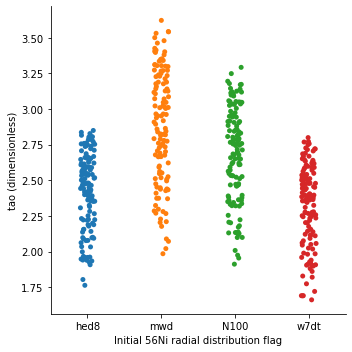

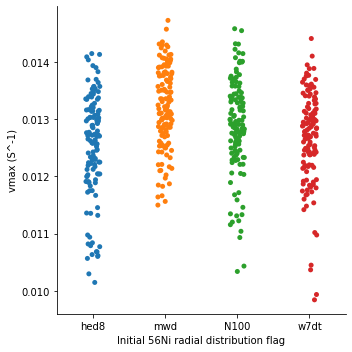

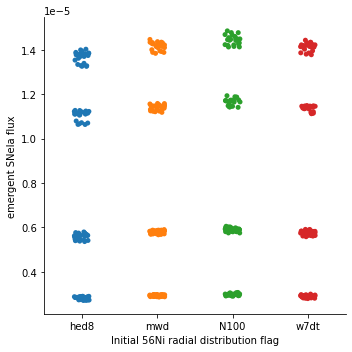

In [15]:
sns.catplot(y="tao (dimensionless)", x="Initial 56Ni radial distribution flag", data=data)
sns.catplot(y="vmax (S^-1)", x="Initial 56Ni radial distribution flag", data=data)
sns.catplot(y="emergent SNeIa flux", x="Initial 56Ni radial distribution flag", data=data)

From the previous scatter plots it is clear that both the Initial 56Ni radial distribution flag and Initial SNeIa mass distribution flag have a smaller range and more compact nature with tao and vmax, while they are more spread out cwith phi 300.

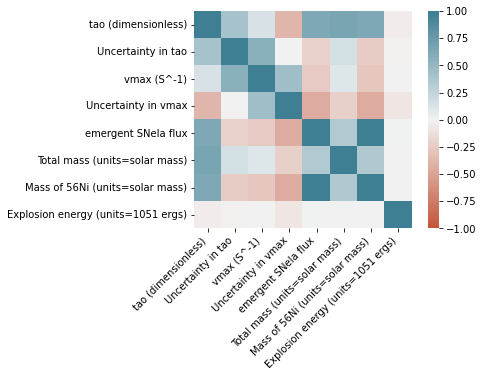

In [16]:
all_corr = data.corr()
ax = sns.heatmap(
    all_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

it seems that explosion energy has no correlation with any other parameter, while the other physical parameter seems more correlated with the rest, especially with tao.

#Task 3

back when we were exploring the data, we realized that 2 of our physical parameters are categorial while the other three were numerical, so to make a model that will predict both categorical and numerical values there could be 2 approaches, one is to use a neural network that will predict both of our categorical and physical parameters.
I gave up on this approach as it turned out to be trickier than I thought and instead went with a simpler approach, training a bunch of regression models to predict the numerical parameters and training another bunch of classifiers to predict the categorical parameters.

In [17]:
#since these features won't be needed to predict the physical parameters I went ahead and dropped, this might not have been the best course of action
#but it was the best I could do.
data = data.drop(['Uncertainty in tao', 'Uncertainty in vmax'], axis=1)

In [18]:
#  we split our data into training feutures and labels
X = data[data.columns[:3]]
y_numerical = data[data.columns[3:6]]
y_categorical = data[data.columns[6:]]

In [19]:
# we transform the data by using a scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
# we then split it into training and validation sets
from sklearn.model_selection import train_test_split
X_train_numerical, X_val_numerical, y_train_numerical, y_val_numerical = train_test_split(X, y_numerical, test_size=0.1, random_state=42)
X_train_categorical, X_val_categorical, y_train_categorical, y_val_categorical = train_test_split(X, y_categorical, test_size=0.1, random_state=42)

#Numerical Outputs

We use some traditional machine learning techniques to train our models and we then evaluate them using cross-validation, we then choose the model with the smallest error, turns out that model is the simple linear regression.

In [21]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [22]:
svr = SVR(kernel="poly", degree=5, C=1, epsilon=0.1)
svr_model = MultiOutputRegressor(estimator=svr)
linear_model = LinearRegression()
neighbours_model = KNeighborsRegressor()
tree_model_reg = DecisionTreeRegressor()
forest_model_reg = RandomForestRegressor()
models = [svr_model, linear_model, neighbours_model, tree_model_reg, forest_model_reg]
model_names = ['svr_model', 'linear_model', 'neighbours_model', 'tree_model', 'forest_model']

In [23]:
svr_model.fit(X_train_numerical, y_train_numerical)
linear_model.fit(X_train_numerical, y_train_numerical) 
neighbours_model.fit(X_train_numerical, y_train_numerical)
tree_model_reg.fit(X_train_numerical, y_train_numerical)
forest_model_reg.fit(X_train_numerical, y_train_numerical)

RandomForestRegressor()

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
model_scores = []
for i in models:
  scores = cross_val_score(i, X_train_numerical, y_train_numerical, scoring='neg_mean_squared_error')
  rmse_scores = np.sqrt(-scores)
  model_scores.append(rmse_scores)

In [25]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
for i in range(0, len(model_scores)):
  print(model_names[i])
  display_scores(model_scores[i])

svr_model
Scores: [0.4504343  0.4942293  0.47823775 0.4637866  0.46066032]
Mean: 0.46946965571955823
Standard deviation: 0.015245759130226215
linear_model
Scores: [0.40448936 0.41034777 0.41123593 0.40938396 0.41434615]
Mean: 0.4099606339283259
Standard deviation: 0.0032023847752700387
neighbours_model
Scores: [0.44887541 0.43161686 0.43394132 0.44476545 0.44605558]
Mean: 0.4410509240834096
Standard deviation: 0.0069226400224671495
tree_model
Scores: [0.58222462 0.53524341 0.60080713 0.57463757 0.54859835]
Mean: 0.5683022134885407
Standard deviation: 0.023544283264943292
forest_model
Scores: [0.44860122 0.45350373 0.46022203 0.43867525 0.45644967]
Mean: 0.4514903799986927
Standard deviation: 0.007449357559976317


#Categorial Outputs

The process for the categorical labels is not that different from the one we used on the numerical labels, except that we used a validation set to test our accuracy and the best we got was a 67% by a random forest classifier, some ways to improve our model would be to increase the training set size, or maybe removing the outliers in vmax, or even using a more complex model.

In [26]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
svc = SVC(kernel="poly")
svc_model = MultiOutputClassifier(estimator=svc)
svc_model.fit(X_train_categorical, y_train_categorical)
svc_model.score(X_val_categorical, y_val_categorical)

0.28846153846153844

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn_model = MultiOutputClassifier(estimator=knn)
knn_model.fit(X_train_categorical, y_train_categorical)
knn_model.score(X_val_categorical, y_val_categorical)

0.28846153846153844

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree_model = MultiOutputClassifier(estimator=tree)
tree_model.fit(X_train_categorical, y_train_categorical)
tree_model.score(X_val_categorical, y_val_categorical)

0.5

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200)
forest_model = MultiOutputClassifier(estimator=forest)
forest_model.fit(X_train_categorical, y_train_categorical)
forest_model.score(X_val_categorical, y_val_categorical)

0.6730769230769231

#Final Model
having chosen our two best models (that are not that great to be honest), we combine them into a single model to predict any new point


In [30]:
def test_predict(test_point):
  output_reg = (linear_model.predict(test_point)).T
  output_clf = (forest_model.predict(test_point)).T
  output = (np.concatenate((output_reg, output_clf))).T
  return output

In [31]:
test_points = [[[.35, 0.015, 1.20*10**-5]]
              ,[[2.54, 0.013, 5.02*10**-6]]
              ,[[2.46, 0.013, 1.03*10**-5]]]
outputs = []
for point in test_points:
  outputs.append(test_predict(point))

print(outputs)

[array([[1.6294630352741817, 0.39301049520680753, 1.3671451723849768,
        'hed8', 'N100']], dtype=object), array([[2.337163475546479, 0.38960557227886755, 1.3020903009208, 'mwd',
        'mwd']], dtype=object), array([[2.3113119739062666, 0.3897311610054783, 1.3044660184623893,
        'mwd', 'mwd']], dtype=object)]
